<a href="https://colab.research.google.com/github/mohitiitr/bb84piby8basis/blob/master/BB84piby8basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install qiskit

# BB84 Quantum Key Distribution (QKD) Protocol Using Basis (pi/4,0)and(5pi/4,0). 
 
BB84 is a quantum key distribution scheme developed by Charles Bennett and Gilles Brassard in 1984 ([paper]).
This file discuss the case without evesdroppers.

The basis are given name as M basis .

First is $cos (\pi/8) \ket{0} +sin(\pi/8)\ket{1}$ denoted by everywhere further by $ \ket{m1/8}$.

Second is  $cos (5\pi/8) \ket{0} +sin(5\pi/8)\ket{1}$ denoted by everywhere further by $ \ket{m5/8}$.

[paper]: http://researcher.watson.ibm.com/researcher/files/us-bennetc/BB84highest.pdf 

$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

In [21]:
from qiskit import BasicAer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import IBMQ

from qiskit.tools.monitor import job_monitor
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Visualing States of M basis 

In this section there is the code to help us see the visual form of our considered M basis on Bloch Sphere.

In [0]:
BasicAer.backends()
backend = BasicAer.get_backend('statevector_simulator')

Job Status: job has successfully run


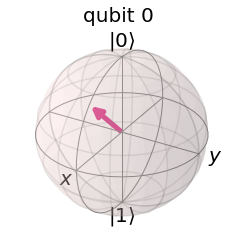

In [23]:
m18 = QuantumRegister (1)
c18 = ClassicalRegister(1)
circ2 =QuantumCircuit(m18,c18)
circ2.ry(pi/4, m18)


job1 =execute(circ2,backend)
job_monitor(job1)
result1=job1.result()
chi=result1.get_statevector(circ2)
plot_bloch_multivector(chi)

Job Status: job has successfully run


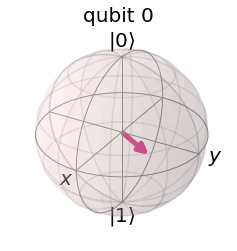

In [24]:
m58 = QuantumRegister (1)
c58 = ClassicalRegister(1)
circ3 =QuantumCircuit(m58,c58)
circ3.x(m58)
circ3.ry(pi/4, m58)


job2 =execute(circ3,backend)
job_monitor(job2)
result2=job2.result()
chi_anti_polar=result2.get_statevector(circ3)
plot_bloch_multivector(chi_anti_polar)


## Choosing bases and encoding states

Alice generates two binary strings. One encodes the basis for each qubit:

0 $\rightarrow$ Computational basis

1  $\rightarrow$ M basis

The other encodes the state:

0  $\rightarrow \ket{ 0 } or \ket{m1/8} $ 

1  $\rightarrow \ket{ 1 } or \ket{m5/8} $ 

Bob also generates a binary string and uses the same convention to choose a basis for measurement


In [25]:
num_qubits = 24 


alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print(alice_state)
print(alice_basis)
print(bob_basis)

[0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1]
[0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
[1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]


## Creating the circuit

Based on the following results:

$X\ket{0} = \ket{1}$

$Ry(\pi/4,0)\ket{0} = \ket{m1/8}$


$ Ry(\pi/4,0)X\ket{0} = \ket{m5\pi/8}$

Our algorithm to construct the circuit is as follows:

1. Whenever Alice wants to encode 1 in a qubit, she applies an $X$ gate to the qubit. To encode 0, no action is needed.
2. Wherever she wants to encode it in the M basis, she applies an $Ry(\pi/4)$ gate. No action is necessary to encode a qubit in the computational basis.

3. She then _sends_ the qubits to Bob (symbolically represented in this circuit using wires)

4. Bob measures the qubits according to his binary string. To measure a qubit in the M basis, he applies an $Ry(-\pi/8)$ gate to the corresponding qubit and then performs a mesurement on the computational basis. (Here $-\pi/4$ can be interpreted as $+(2\pi-\pi/4)$  rotation of theta ) 



In [26]:
q = QuantumRegister(num_qubits,'q')
c = ClassicalRegister(num_qubits,'c')

bb84 = QuantumCircuit(q,c,name='bb84')

# Alice prepares her qubits
for index, _ in enumerate(alice_basis):
    if alice_state[index] == 1:
        bb84.x(q[index])
    if alice_basis[index] == 1:
        bb84.ry(pi/4 , q[index])
bb84.barrier()  

# Bob measures the received qubits
for index, _ in enumerate(bob_basis):
    if bob_basis[index] == 1:
        bb84.ry(-pi/4 ,q[index])
        
bb84.barrier()        
bb84.measure(q,c)
    
            
bb84.draw()


In [0]:
#USE THESE LINES TO RUN THE CODE ON IBMQ MACHINES WITH YOUR IDENTIFICATION TOKEN

# token = ''
# IBMQ.enable_account(token)
# IBMQ.backends()



## Performing the actual experiment

Run the code on the desired backend. Use the cell above to authenticate yourself to the IBMQ network.

In [27]:
backend = BasicAer.get_backend('qasm_simulator')
# backend = IBMQ.get_backend('ibmq_16_melbourne')
# backend = IBMQ.get_backend('ibmq_qasm_simulator')

job = execute(bb84,backend,shots=1024)

job_monitor(job)

result = job.result()
counts = result.get_counts()

# Prints out all the measured binary strings by Bob (reversed)
for count in [*counts]:
    print(count) 

Job Status: job has successfully run
100111101111110011110011
101111101111111110110010
111011101111110111110110
100011101111111111110010
100011101110111011110000
111111101110110011010010
100111100111111011110000
100111100110111000110000
110111101111111011010000
101011101110111011110010
100111101111111010111001
101111101111111111010010
100111101110111010110011
100111100111110111110010
110111101111111110110010
110111101110111011110010
100111101110110011110011
100111101110111010110010
100111101111110011110000
110111100111111011110100
110111101111111011110111
100111101110110011110110
100111101111111111111011
100111101111111001010010
101111101111110011111111
101111101111111001110000
111111100111111001110010
100111101111111000010011
100111100110111011110010
100111100111111011110001
100111101111110011010110
100111100111111011010011
100111101110111111110010
101111101111111011111110
101111100111111010110001
100011101111111111111010
110111101111111011110010
100111101111111011010110
1000111001111

In [28]:
for i,temp_key in enumerate([*counts]):
    temp_key_rev = temp_key[::-1] # qubit orders are reversed in qiskit
    alice_key = ''
    bob_key= ''
    for i in range(num_qubits):
        if alice_basis[i] == bob_basis[i]: # Only choose bits where Alice and Bob chose the same basis
             bob_key += str(temp_key_rev[i])
             alice_key += str(alice_state[i])
    print (alice_key + "       "+bob_key)

1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       1111101111
1111101111       111

# Whether The M-Basis are better or Hadamard Basis are better

Analysis is as follows :-
## Hadamard Basis

Here the table contains all the possible cases .
First there are those where there is correlation ,each case is actually equal to two test cases.
The other with probability zero.
But the important to us are  only those cases where the basis of Alice and Bob's don't match.

### Table with no Eve's Dropping.

| Alice Basis | Alice's bit |Alice st.vector|Bob's Basis |Result |Pobability Of Measurement|
|-------|-----------|--------|----------|------------|----------|
|Comp.|0|$\ket{0}$|Comp.|0|1
|Comp.|1|$\ket{1}$|Comp.|1|1|
|Hadamard|0|$\ket{+}$|Hadamard|0|1|
|Hadamard|1|$\ket{-}$|Hadamard|1|1
|Comp.|0|$\ket{0}$|Hadamrad|0|1/2|
|Comp.|0|$\ket{0}$|Hadamard|1|1/2|
|Comp.|1|$\ket{1}$|Hadamrad|0|1/2|
|Comp.|1|$\ket{1}$|Hadamard|1|1/2|
|Hadamard|0|$\ket{+}$|Comp.|0|1/2
|Hadamard|0|$\ket{+}$|Comp.|1|1/2
|Hadamard|1|$\ket{-}$|Comp.|0|1/2
|Hadamard|1|$\ket{-}$|Comp.|1|1/2

### Table with Eve's Dropping (With only those cases where Alice and bob have same Basis and Eves have different basis  to them)

Alice basis are AB 
,Computational is C, 
Hadamard is H. 
Alice bit is Abit, 
Alice's statevectors is ASV.  
Bob's result is BR and His probability of measurment is BP. 
Eve's basis EB, 
Eve's result is ER, Eve's Probability of measurement




|AB|Abit|ER|EP|BR|BP|Error Detected
|----------|----------|--------------|----------|-----------------|-------------|------------|
|C|0|0|1/2|0|1/2|N
|C|0|0|1/2|1|1/2|Y
|C|0|1|1/2|0|1/2|Y
|C|0|1|1/2|1|1/2|N
|H|0|0|1/2|0|1/2|N
|H|0|0|1/2|1|1/2|Y
|H|0|1|1/2|0|1/2|N
|H|0|1|1/2|1|1/2|Y


From just above table it is clear that in the key values, when eve chooses different basis then that of Alice(and Bob) (this event happens in half cases) the result is that in outcomes there is half probability that bob's bits value mismatch hence the net key di
ffers  in 1/4 values as probabilistically.





## M Basis


### Table with Eve's Dropping (With only those cases where Alice and bob have same Basis and Eves have different basis  to them)
|AB|Abit|ER| __  _ _ _EP_ _  _ _ _ |BR| __  _ _ _BP_ _  _ _  |Error Detected
|----------|----------|--------------|---------------------|-----------------|-------------|------------|
|C|0|0|$cos^2(\pi/8)$|0|1/2|N
|C|0|0|1/2|1|1/2|Y
|C|0|1|1/2|0|1/2|Y
|C|0|1|1/2|1|1/2|N
|H|0|0|1/2|0|1/2|N
|H|0|0|1/2|1|1/2|Y
|H|0|1|1/2|0|1/2|N
|H|0|1|1/2|1|1/2|Y


WORK UNDER PROGRESS